## Vi skal lige bruge noget data

In [117]:
import pandas as pd

df = pd.read_excel(r'data/Vis_data.xlsx')

df

,Vis,Data-ink,Trustworthiness,Accessibility,Elegance,Tone
0,1 Straffearbejde,8.0,10.0,8.0,5.0,Reading tone
1,1 Straffearbejde,8.0,10.0,5.0,3.0,Reading tone
2,1 Straffearbejde,8.0,9.0,6.0,2.0,Reading tone
3,1 Straffearbejde,8.0,7.0,6.0,6.0,Reading tone
4,1 Straffearbejde,2.0,3.0,2.0,4.0,Reading tone
...,...,...,...,...,...,...
157,12 Tysk skov,3.0,8.0,10.0,10.0,Feeling tone
158,12 Tysk skov,4.0,9.0,10.0,3.0,Reading tone
159,12 Tysk skov,6.0,8.0,3.0,9.0,Feeling tone
160,12 Tysk skov,4.0,3.0,5.0,4.0,Feeling tone


## Det ydmyge søjlediagram

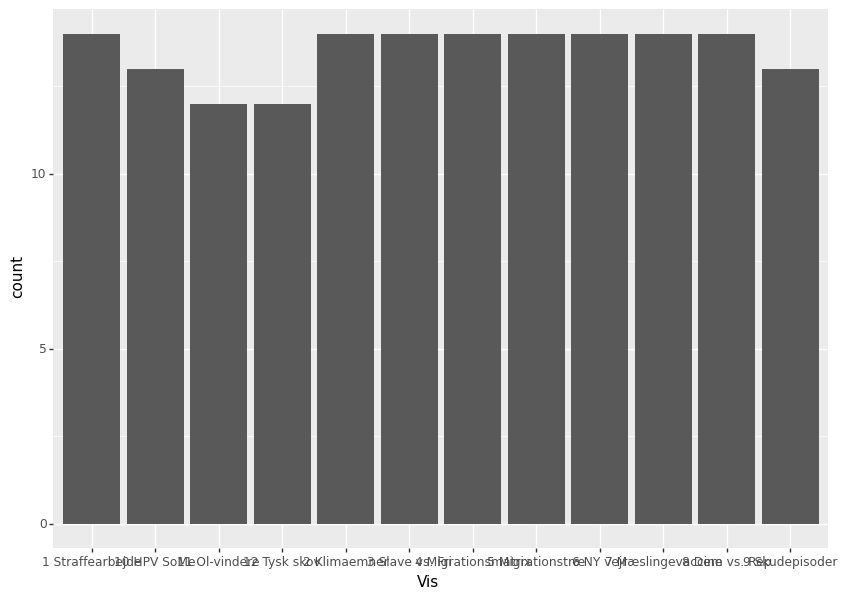

<ggplot: (8760861637828)>

In [118]:
import plotnine as p9
from plotnine import *

p9.options.figure_size = (10, 7)

(ggplot(df)
 + geom_bar(aes(x = 'Vis'))
)

Den skal være en farve! Helt forvirrende, angiver "colour" farven på en streg rundt om søglen. Så farven angiver vi med "fill". Læg mærke placeringen! Fordi farven ikke har noget med dataene at gøre, kommer den først **efter** aes().

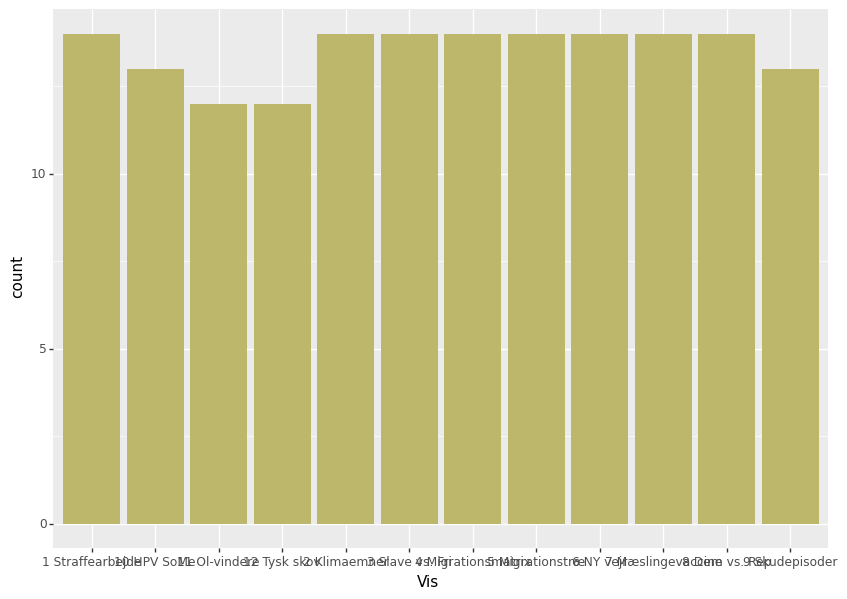

<ggplot: (8760854338780)>

In [119]:
(ggplot(df)
 + geom_bar(aes(x = 'Vis'), fill = "darkkhaki")
)

Nogle geomer transformerer i udgangspunktet data. Geom_bar tæller f.eks. observationer. Vi kan bruge "stat" argumentet til at lave sådanne simple transformationer af data. Så snart det bliver bare lidt avanceret, vil vi dog nok lave disse forinden. Nedenfor er et eksempel, hvor vi udregner gennemsnittet i stedet for at bruge geom_bars default "count".

In [120]:
vis_list = df["Vis"].unique()

vis_list = vis_list[::-1]

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_summary : Removed 1 rows containing non-finite values.


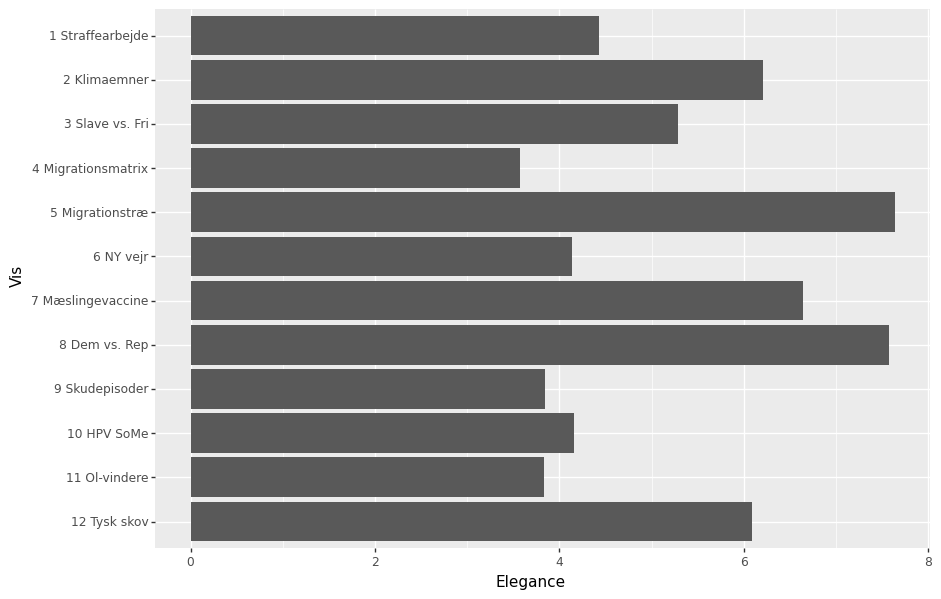

<ggplot: (8760854313153)>

In [121]:
(ggplot(df)
 + geom_bar(aes(x = 'Vis', y = 'Elegance'),
           stat = "summary")
 + scale_x_discrete(limits = vis_list)
 + coord_flip()
)

Vi kan gruppere ved at knytte farve til en værdi. I udgangspunket "stacker" geom_bar vores søjler.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_summary : Removed 1 rows containing non-finite values.


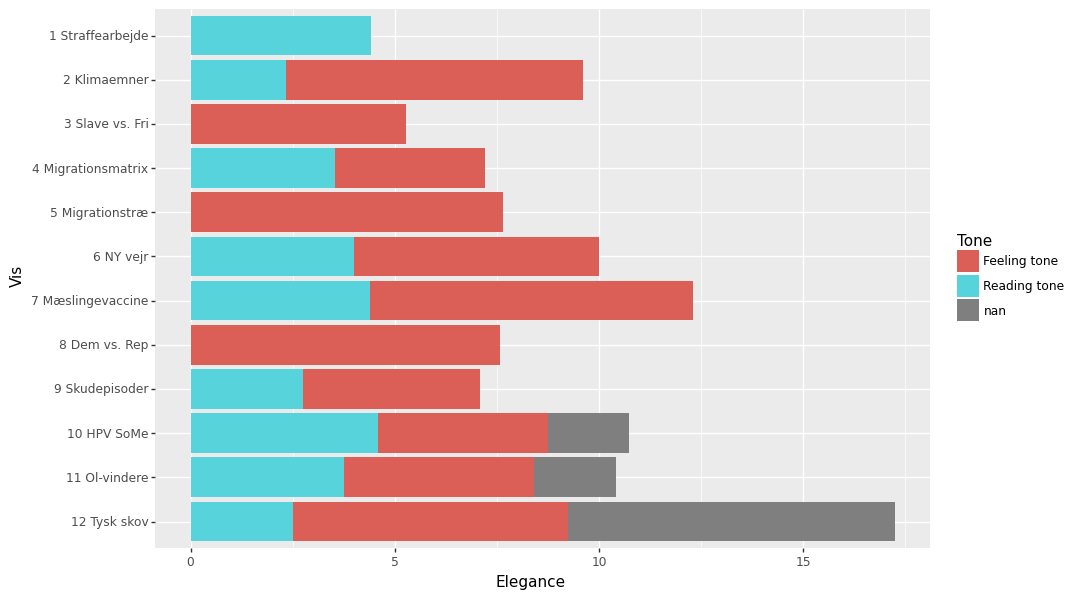

<ggplot: (8760864024296)>

In [122]:
(ggplot(df)
 + geom_bar(aes(x = 'Vis', y = 'Elegance', fill = "Tone"),
           stat = "summary")
 + coord_flip()
 + scale_x_discrete(limits = vis_list)
)

Rimeligt ulæselig, fordi y-aksen bliver noget vrøvl. Vi kan bruge "position" til at afhjælpe det.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_summary : Removed 1 rows containing non-finite values.


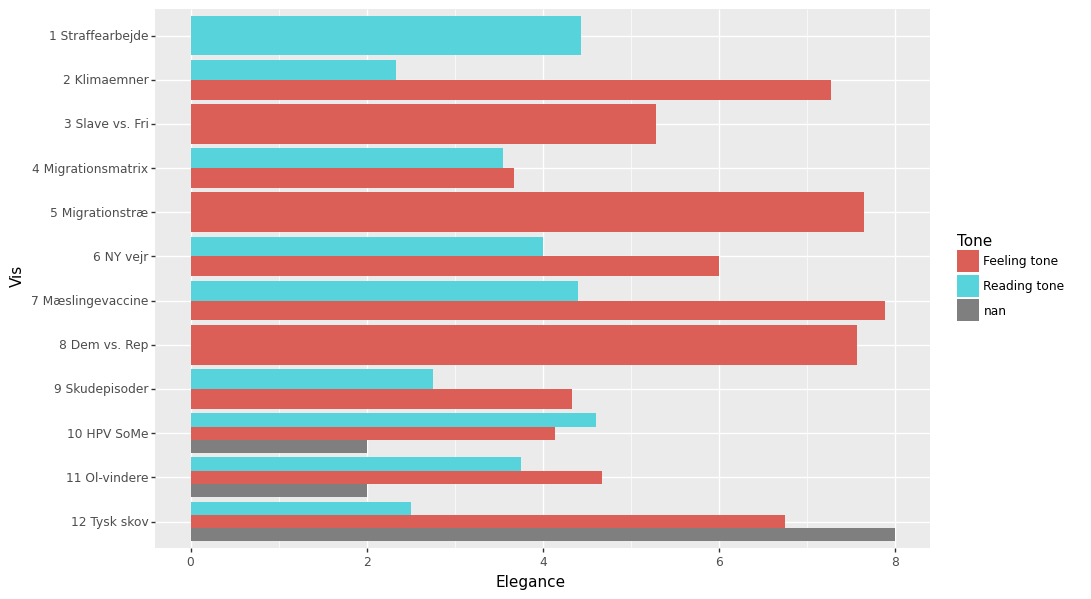

<ggplot: (8760860925444)>

In [123]:
(ggplot(df)
 + geom_bar(aes(x = 'Vis', y = 'Elegance', fill = "Tone"),
           stat = "summary", position = "dodge")
 + scale_x_discrete(limits = vis_list)
 + coord_flip()
)

In [124]:
kolonner_med_tal = ["Data-ink", "Trustworthiness", "Elegance", "Accessibility"]

df_transformed = df.groupby(['Vis'], as_index = False)[kolonner_med_tal].mean()

df_transformed

,Vis,Data-ink,Trustworthiness,Elegance,Accessibility
0,1 Straffearbejde,6.642857,7.428571,4.428571,5.428571
1,10 HPV SoMe,5.461538,5.538462,4.153846,3.769231
2,11 Ol-vindere,5.583333,5.500000,3.833333,4.500000
3,12 Tysk skov,4.454545,6.272727,6.090909,6.636364
4,2 Klimaemner,5.642857,4.857143,6.214286,3.714286
5,3 Slave vs. Fri,6.142857,6.357143,5.285714,6.071429
6,4 Migrationsmatrix,4.928571,5.857143,3.571429,3.000000
7,5 Migrationstræ,5.642857,4.357143,7.642857,3.214286
8,6 NY vejr,5.285714,7.142857,4.142857,4.642857
9,7 Mæslingevaccine,5.785714,6.285714,6.642857,5.153846


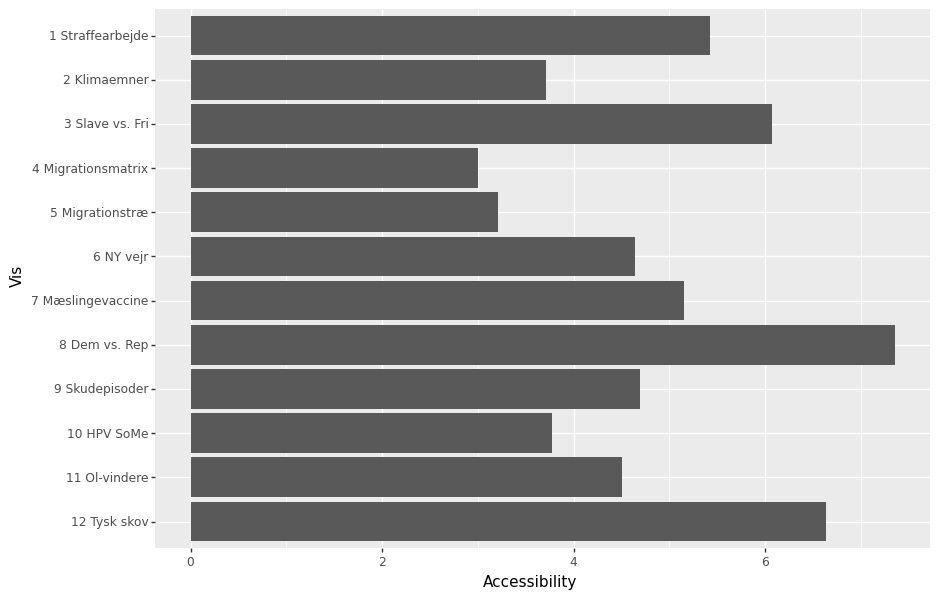

<ggplot: (8760861507175)>

In [125]:
(ggplot(df_transformed)
 + geom_col(aes(y = "Accessibility", x = "Vis"))
 + scale_x_discrete(limits = vis_list)
 + coord_flip()
)

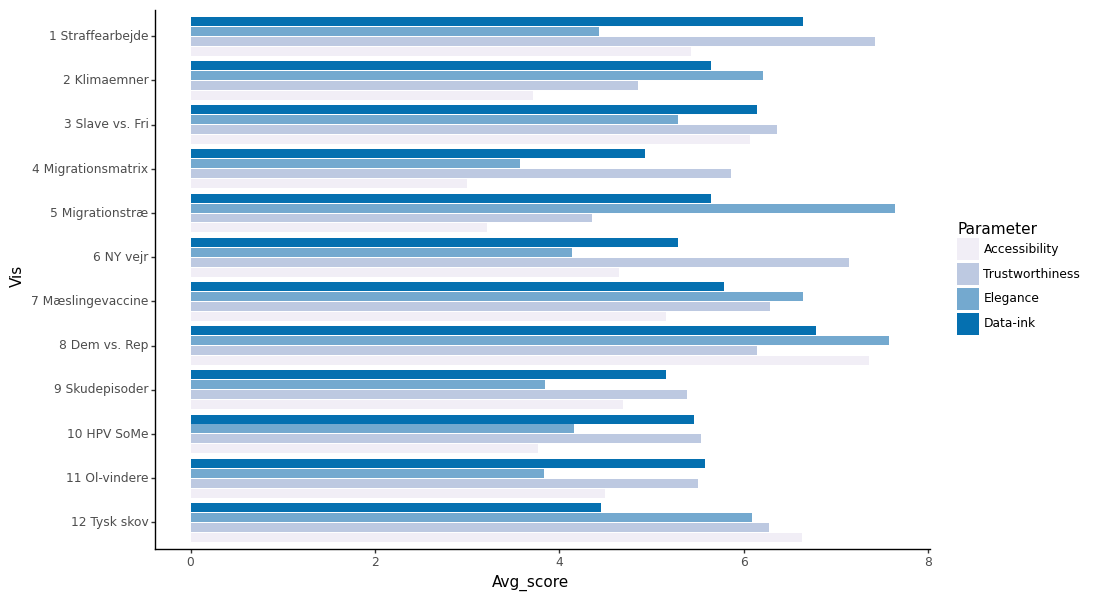

<ggplot: (8760863848500)>

In [126]:
df_lang = pd.melt(frame = df_transformed, 
                  id_vars = "Vis", 
                  var_name = "Parameter", 
                  value_name = "Avg_score")

df_lang = df_lang.assign(Parameter = pd.Categorical(df_lang["Parameter"],
                                                 ["Accessibility", "Trustworthiness",
                                                  "Elegance", "Data-ink"]))


(ggplot(df_lang)
 + geom_col(aes(x = "Vis", y = "Avg_score", fill = "Parameter"), position = "dodge2")
 + coord_flip()
 + scale_x_discrete(limits = vis_list)
 + scale_fill_brewer(palette = 9)
 + theme_classic()
)

Prøv at skifte position "dodge" ud med "dodge2" eller "fill". I udgangspunktet bruger de fleste geomer positionsargumentet "identity".



## Lad os bruge en masse forskellige geomer og se hvordan de ser ud!

Hvor søjlediagrammer typisk plotter en værdi på en akse og en kategori på en anden, kan vi bruger punktdiagrammer til at plotte to værdier i forhold til hinanden. Punktdiagrammer er ofte ekstremt nyttige i vores egen eksplorative proces, fordi vi ofte udforsker sammenhænge.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


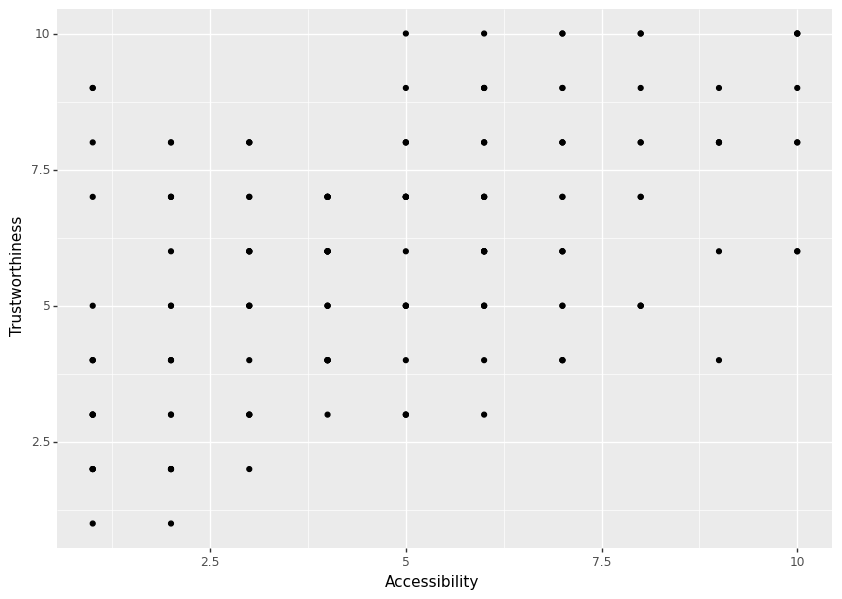

<ggplot: (8760862210347)>

In [127]:
(ggplot(df)
 + geom_point(aes(x = "Accessibility", y = "Trustworthiness"))
)

Læg mærke til akserne!

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


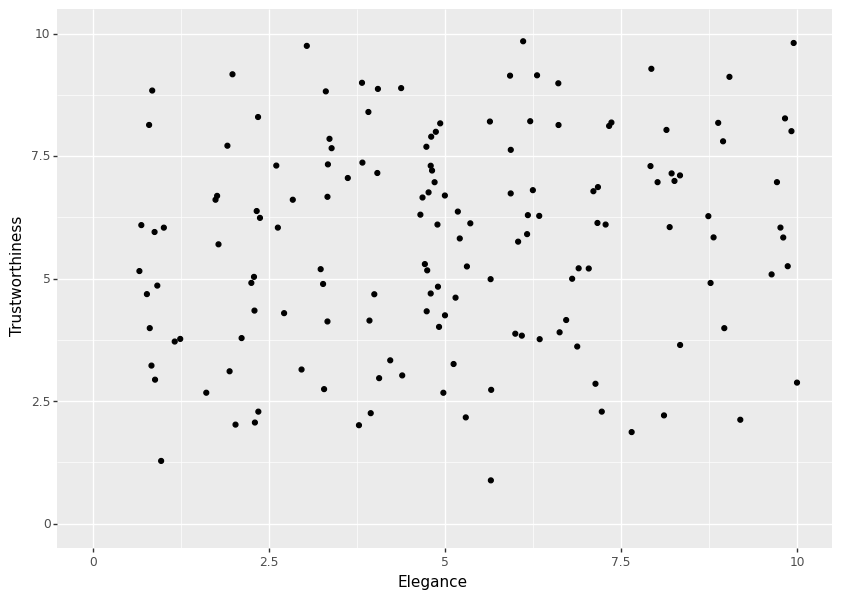

<ggplot: (8760864228913)>

In [128]:
(ggplot(df)
 + geom_point(aes(x = "Elegance", y = "Trustworthiness"), position = "jitter")
 + ylim(0, 10)
 + xlim(0, 10)
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_sum : Removed 2 rows containing non-finite values.


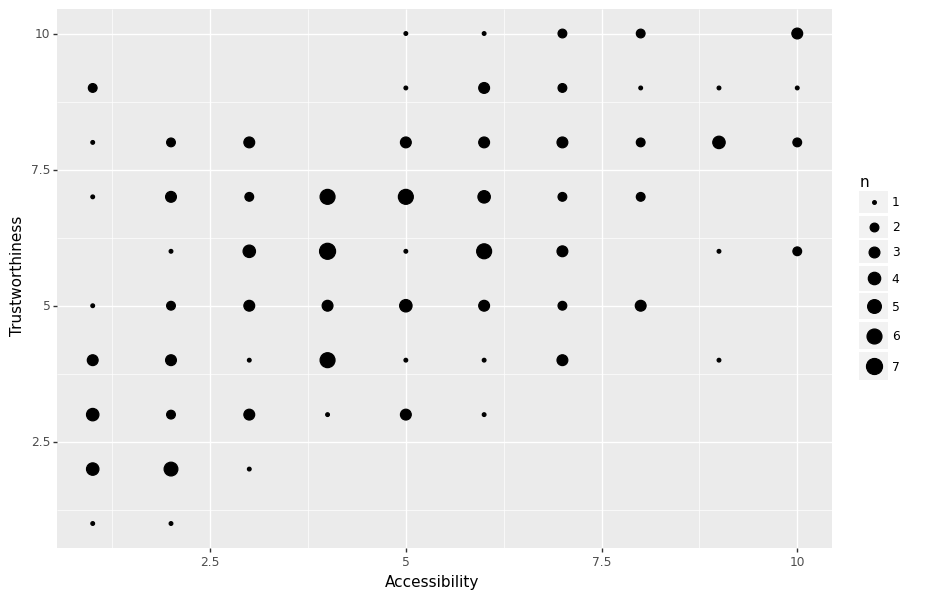

<ggplot: (8760862001183)>

In [129]:
(ggplot(df)
 + geom_count(aes(x = "Accessibility", y = "Trustworthiness"))
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 2 rows containing missing values.


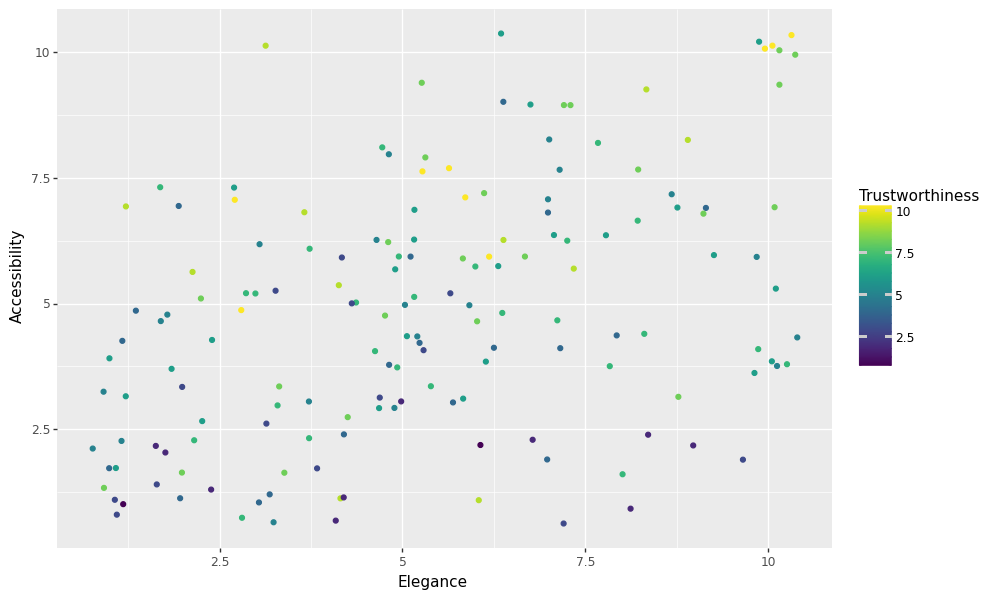

<ggplot: (8760861544108)>

In [130]:
(ggplot(df)
 + geom_jitter(aes(x = "Elegance", y = "Accessibility", colour = "Trustworthiness"))
)

Desværre er det svært at få en tredje kvantitativ værdi med.

Men vi kan let plotte forskellige kategorier.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


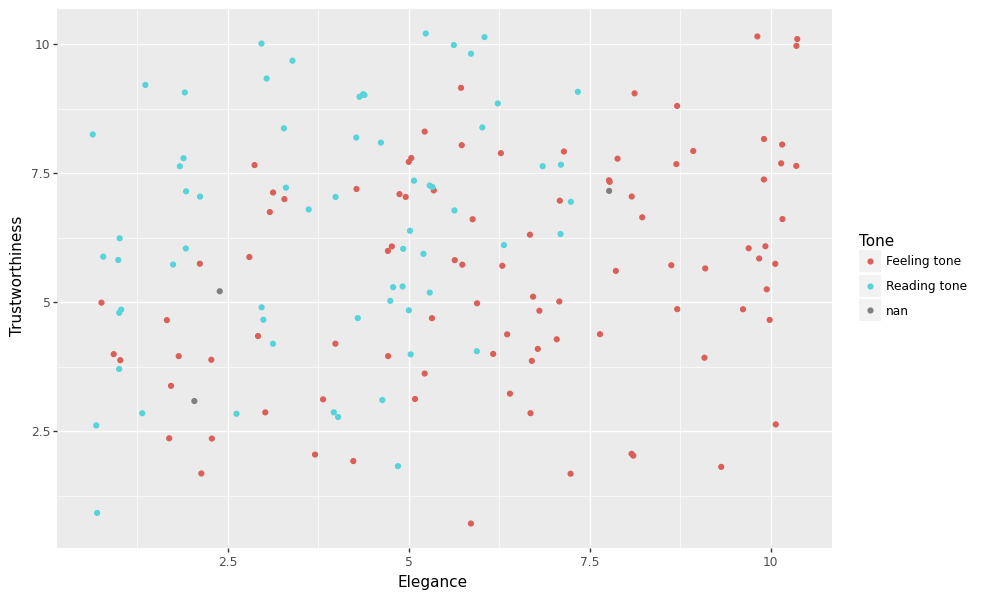

<ggplot: (8760854335675)>

In [132]:
(ggplot(df)
 + geom_jitter(aes(x = "Elegance", y = "Trustworthiness", colour = "Tone"))
)

Til sammenligning er nedenstående sværere at læse.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 4 rows containing missing values.
/opt/conda/lib/python3.9/site-packages/plotnine/guides/guides.py:253: PlotnineWarning: geom_jitter legend : Removed 1 rows containing missing values.


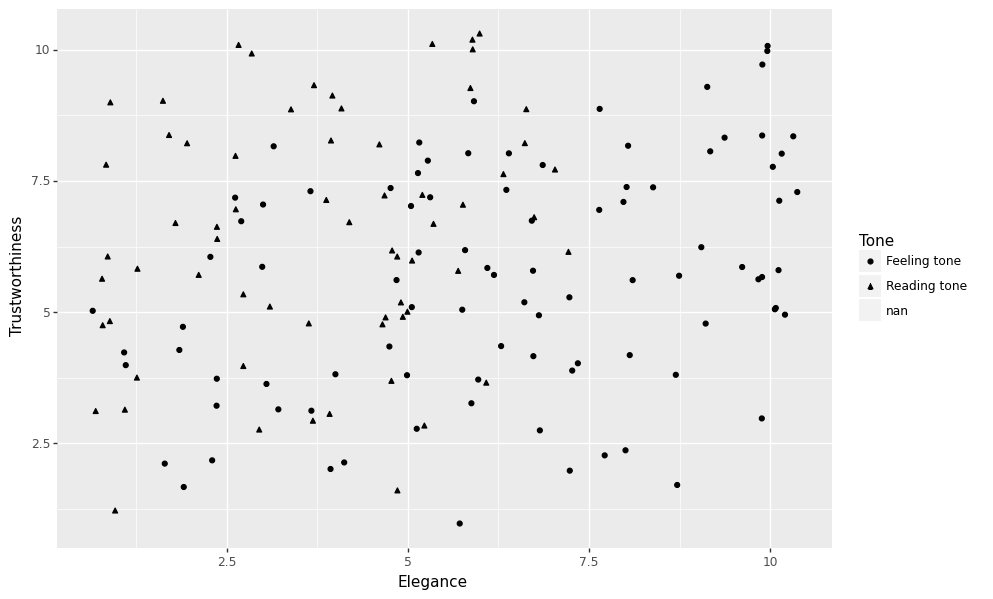

<ggplot: (8760862150623)>

In [133]:
(ggplot(df)
 + geom_jitter(aes(x = "Elegance", y = "Trustworthiness", shape = "Tone"))
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


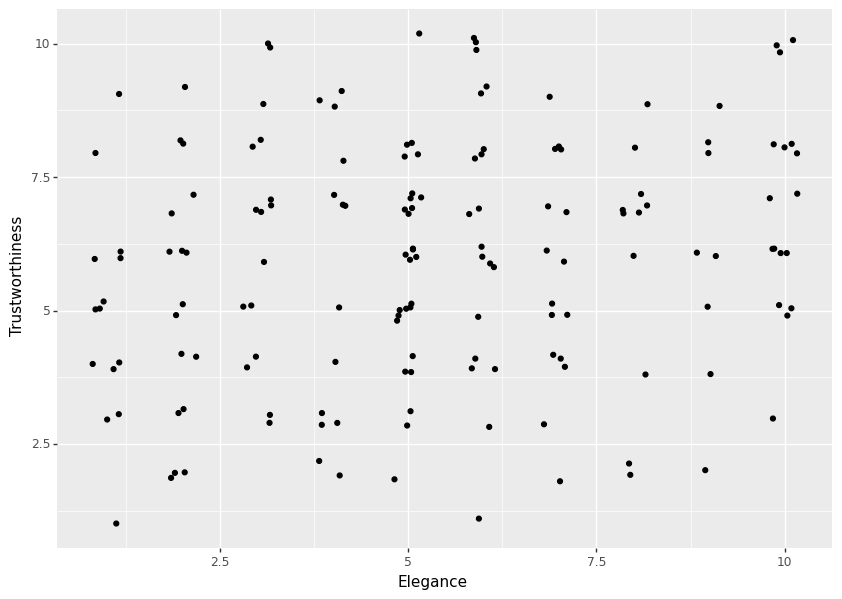

<ggplot: (8760864291530)>

In [134]:
(ggplot(df)
 + geom_jitter(aes(x = "Elegance", y = "Trustworthiness"), width = 0.2, height = 0.2)
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_density_2d : Removed 1 rows containing non-finite values.
/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


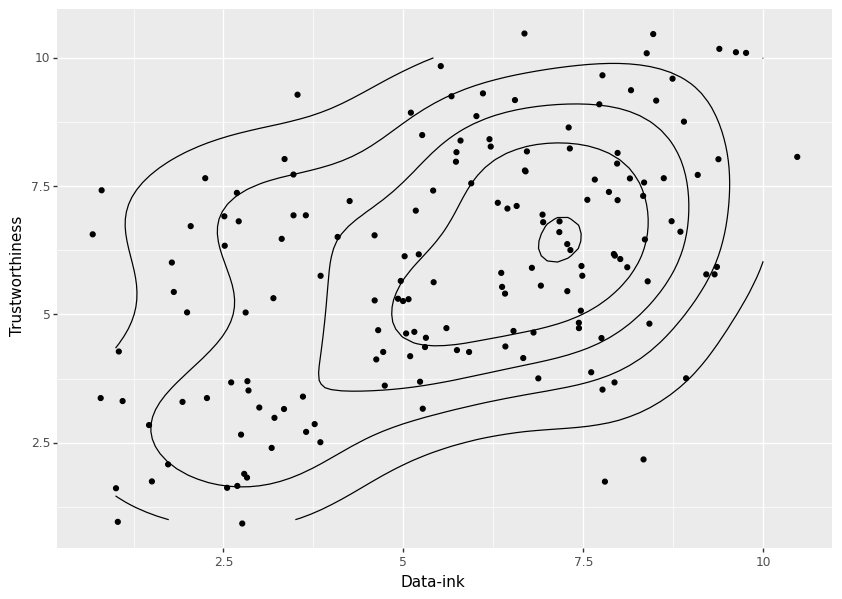

<ggplot: (8760862080371)>

In [158]:
(ggplot(df, aes(x = "Data-ink", y = "Trustworthiness"))
 + geom_jitter(width = 0.5, height = 0.5)
 + geom_density_2d()
)

Vi kan sættes linjer på og vise tendenser

/opt/conda/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


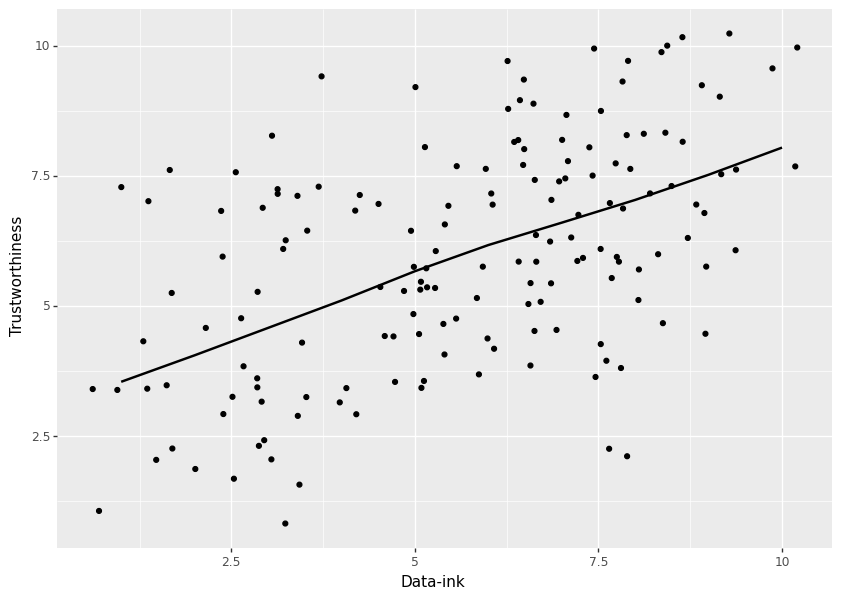

<ggplot: (8760854335275)>

In [159]:
(ggplot(df, aes(x = "Data-ink", y = "Trustworthiness"))
 + geom_jitter(width = 0.5, height = 0.5)
 + geom_smooth()
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


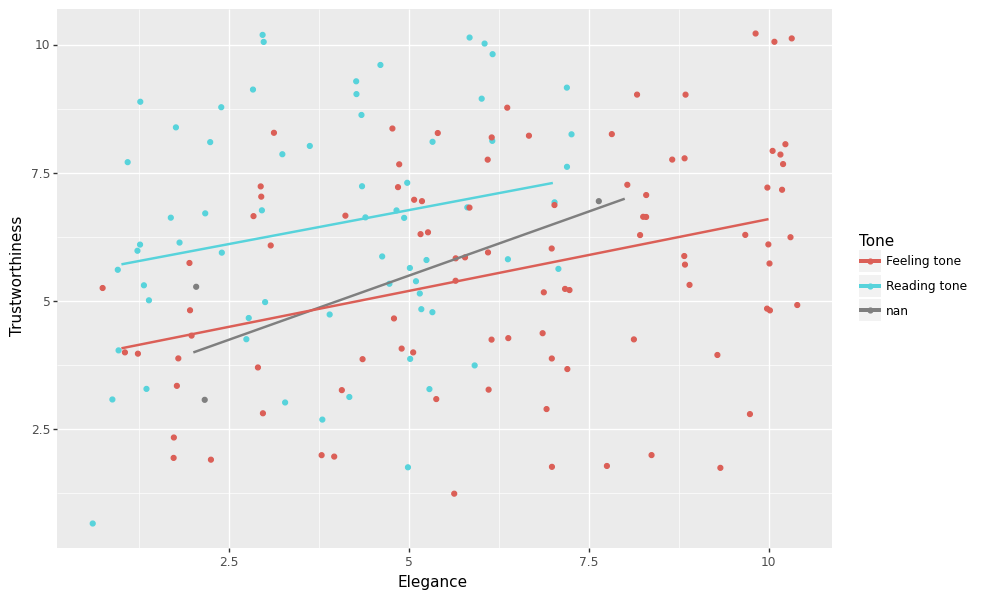

<ggplot: (8760854224951)>

In [160]:
(ggplot(df, aes(x = "Elegance", y = "Trustworthiness", colour = "Tone"))
 + geom_jitter()
 + geom_smooth(method = "lm", se = False)
)

Relationen imellem to sæt af værdier kan også vises som et heatmap. Hvad er forskellen på de to plots nedenfor?

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin_2d : Removed 1 rows containing non-finite values.


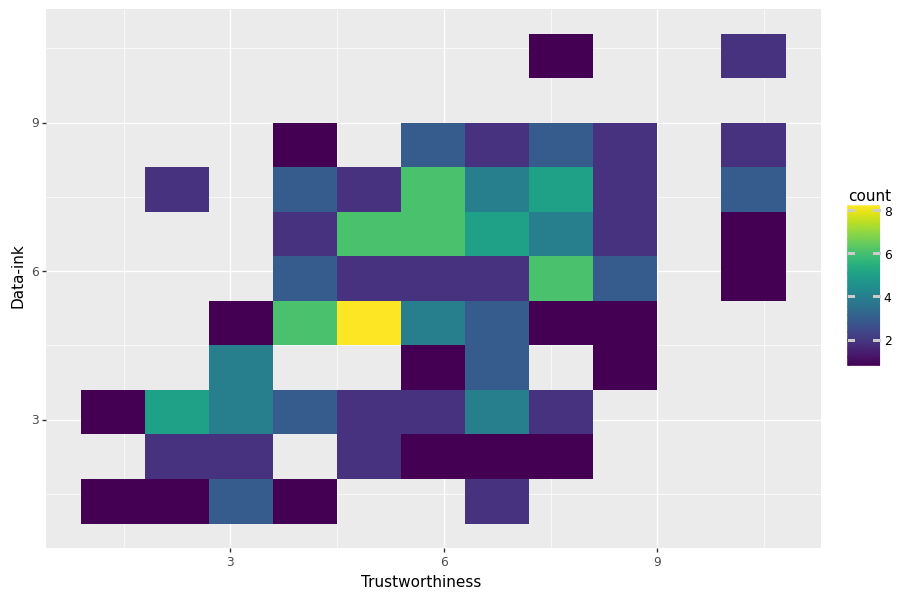

<ggplot: (8760853996026)>

In [161]:
(ggplot(df, aes(x = "Trustworthiness", y = "Data-ink"))
 + geom_bin_2d(size = 10, bins = 10)
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin_2d : Removed 1 rows containing non-finite values.


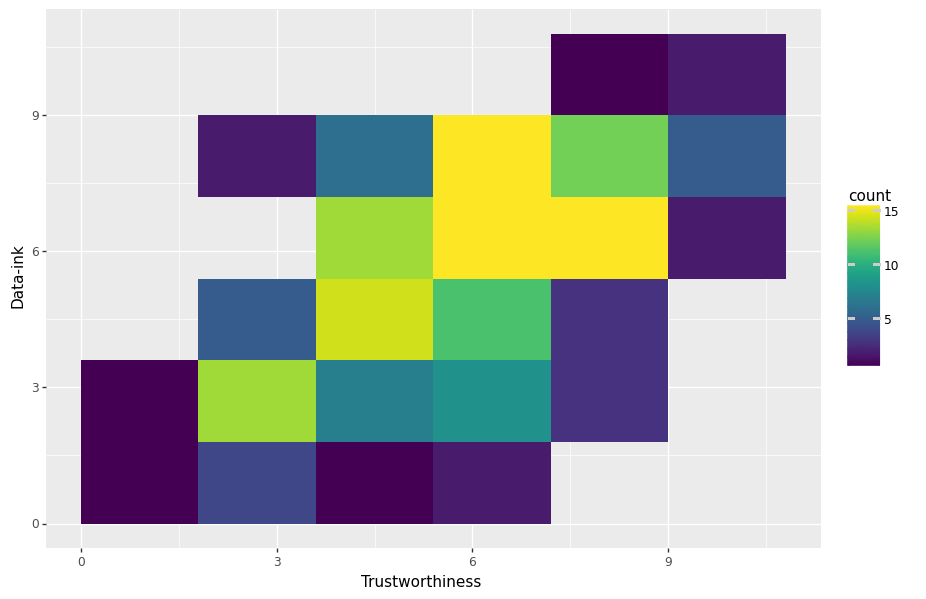

<ggplot: (8760854321369)>

In [138]:
(ggplot(df, aes(x = "Trustworthiness", y = "Data-ink"))
 + geom_bin_2d(size = 10, bins = 5)
)

# "Small multiples"
Tuftes ide om small multiples er bagt ind i funktionen facet_wrap()

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 2 rows containing missing values.


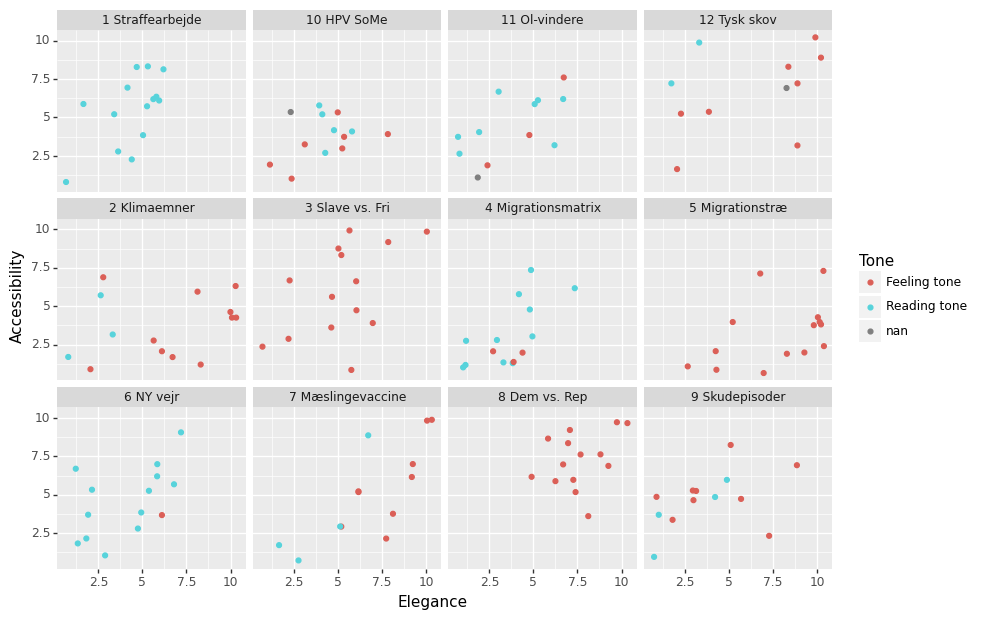

<ggplot: (8760854077745)>

In [140]:
(ggplot(df)
 + geom_jitter(aes(x = "Elegance", y = "Accessibility", colour = "Tone"))
 + facet_wrap("Vis")
)

Plotnines wrap er meget bedre end kantinens!

Vi kan sætte en trendlinje på.

# Linjediagrammer
I kursusgangen blev det lidt fjollet. Her eksemplificeres i stedet med information om benzinpriser hentet fra Ingos hjemmeside.

In [162]:
df_benzin = pd.read_csv("https://www.ingo.dk/sites/default/files/views_data_export/prices_data_export/1668173566/historical-prices.csv", decimal = ",")
df_diesel = pd.read_csv("https://www.ingo.dk/sites/default/files/views_data_export/prices_data_export/1668173586/historical-prices.csv", decimal = ",")

# Hvis links ikke virker, hent nye på https://www.ingo.dk/vores-lave-priser/brændstofpriser/aktuelle-brændstofpriser

df_fuel = pd.concat([df_diesel, df_benzin])

df_fuel["Date"] = pd.to_datetime(df_fuel["Date"])

df_fuel.to_csv("Ingo_priser.csv")

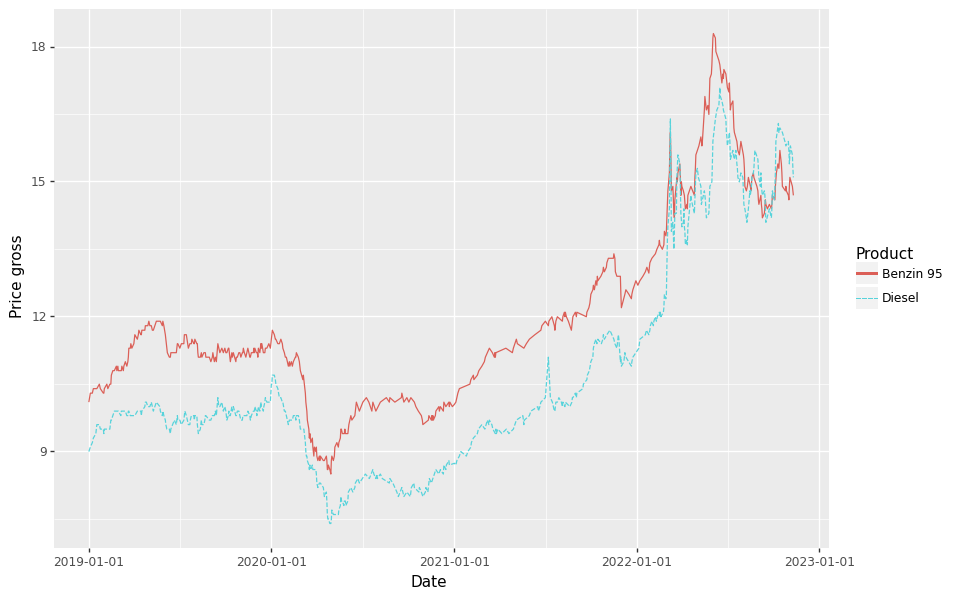

<ggplot: (8760854049118)>

In [163]:
(ggplot(df_fuel, aes(x = "Date", y = "Price gross"))
 + geom_line(aes(linetype = "Product", colour = "Product"))
 + scale_x_datetime(date_breaks = '1 year')
)

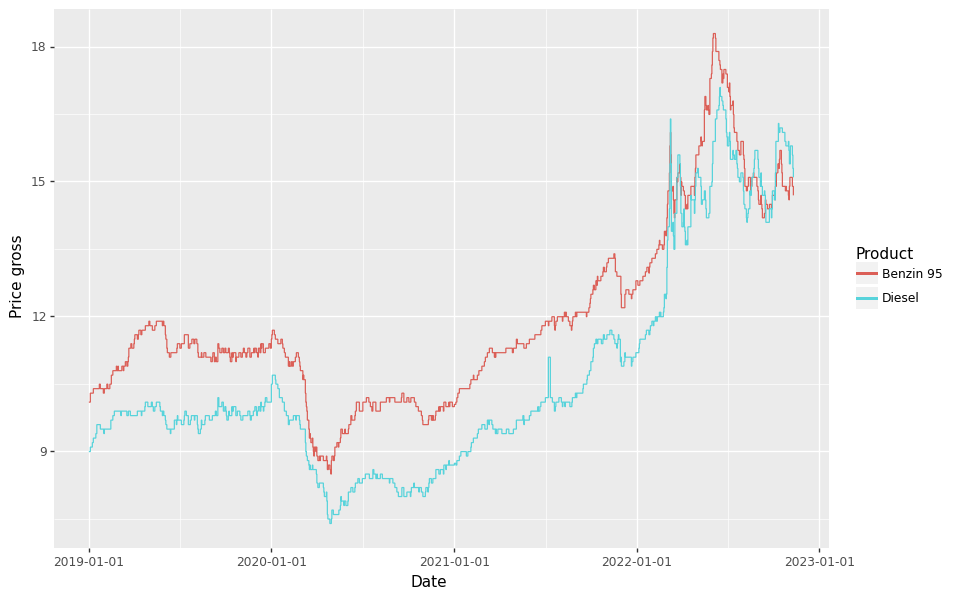

<ggplot: (8760854395341)>

In [164]:
(ggplot(df_fuel, aes(x = "Date", y = "Price gross"))
 + geom_step(aes(colour = "Product"))
 + scale_x_datetime(date_breaks = '1 year')
)

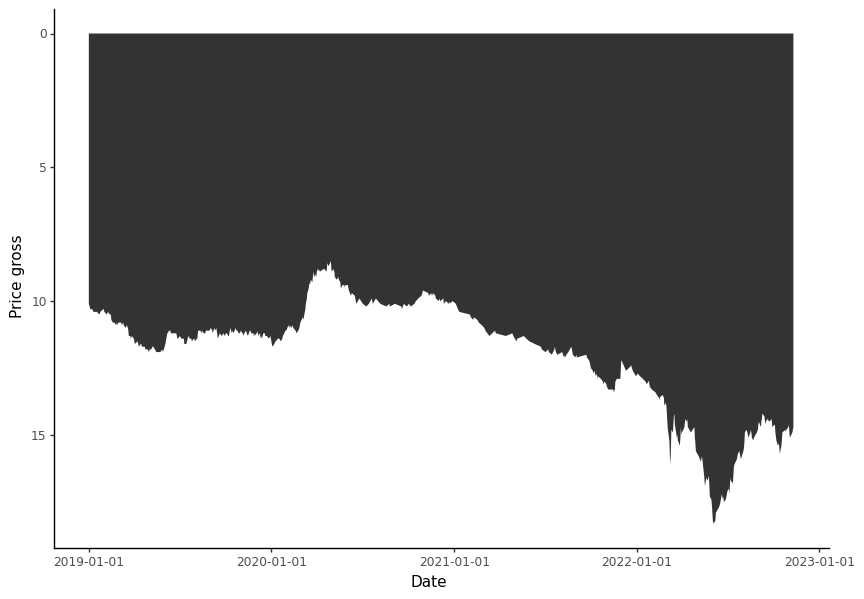

<ggplot: (8760864368177)>

In [165]:
df_benzin = df_fuel.query("Product == 'Benzin 95'")

(ggplot(df_benzin, aes(x = "Date", y = "Price gross"))
 + geom_area()
 + scale_x_datetime(date_breaks = '1 year')
 + scale_y_reverse()
 + theme_classic()
)

# Boxplot og violinplot
Her kan vi se nogle fordelinger grupperet efter kategorier.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


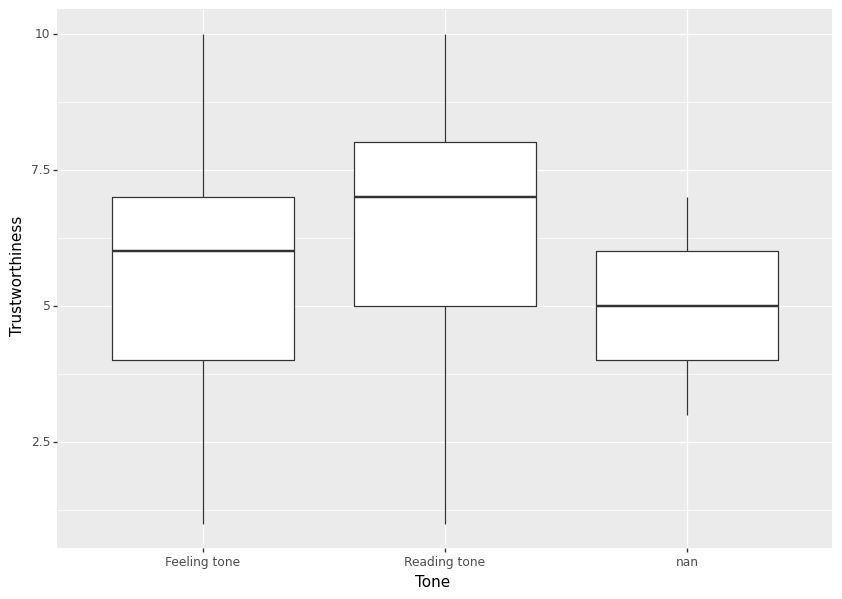

<ggplot: (8760864461020)>

In [166]:
(ggplot(df)
 + geom_boxplot(aes(x = "Tone", y = "Trustworthiness"))
)

In [167]:
df_komplet_lang = pd.melt(frame = df, id_vars = "Vis", 
                          var_name = "Parameter", 
                          value_name = "Score",
                          value_vars = ("Data-ink", "Trustworthiness", "Accessibility", "Data-ink", "Elegance"))

df_komplet_lang

,Vis,Parameter,Score
0,1 Straffearbejde,Data-ink,8.0
1,1 Straffearbejde,Data-ink,8.0
2,1 Straffearbejde,Data-ink,8.0
3,1 Straffearbejde,Data-ink,8.0
4,1 Straffearbejde,Data-ink,2.0
...,...,...,...
643,12 Tysk skov,Elegance,10.0
644,12 Tysk skov,Elegance,3.0
645,12 Tysk skov,Elegance,9.0
646,12 Tysk skov,Elegance,4.0


/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 5 rows containing non-finite values.


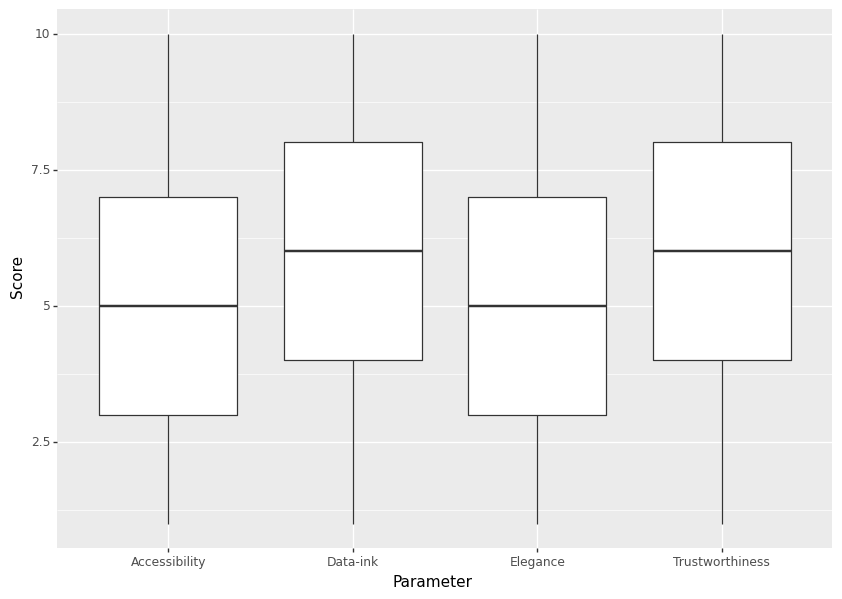

<ggplot: (8760864131265)>

In [168]:
(ggplot(df_komplet_lang)
 + geom_boxplot(aes(x = "Parameter", y = "Score"))
)

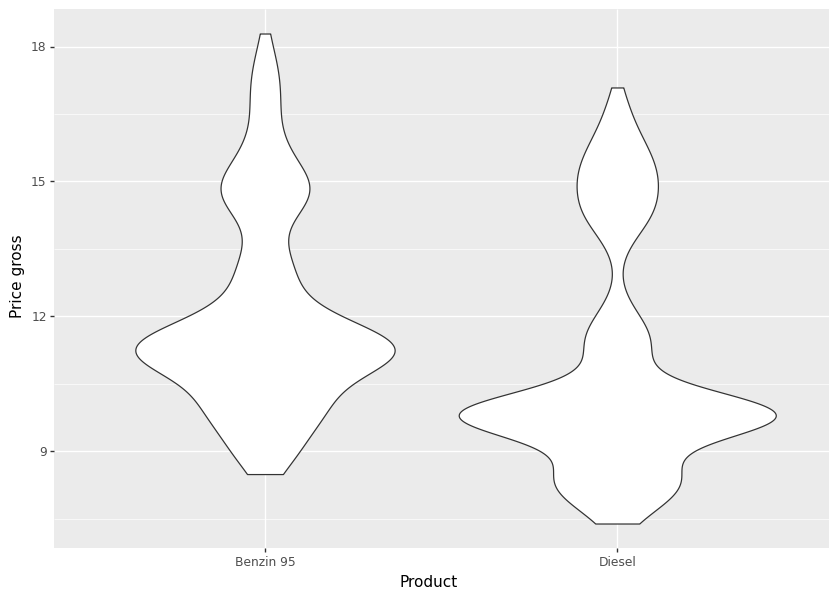

<ggplot: (8760862146419)>

In [149]:
(ggplot(df_fuel)
 + geom_violin(aes(x = "Product", y = "Price gross"))
)

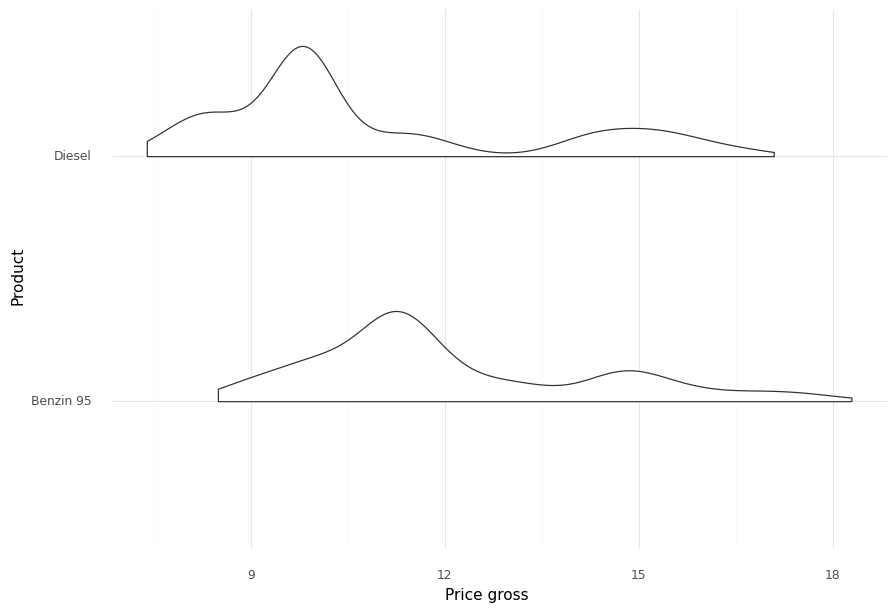

<ggplot: (8760864172183)>

In [150]:
(ggplot(df_fuel)
 + geom_violin(aes(x = "Product", y = "Price gross"), style = "right")
 + coord_flip()
 + theme_minimal()
)

# Heatmap på en matrix

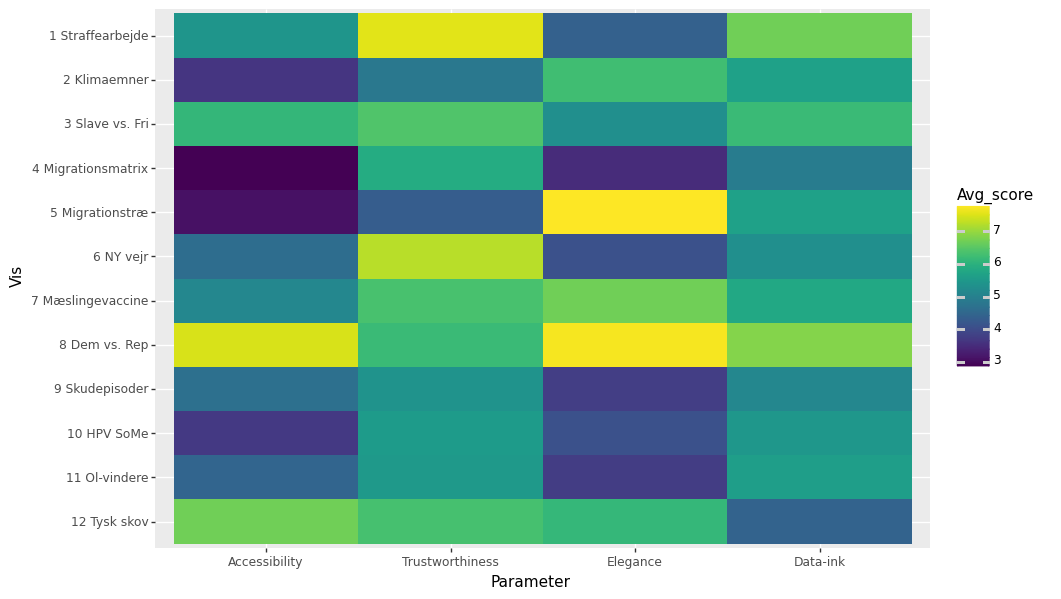

<ggplot: (8760864421663)>

In [151]:
(ggplot(df_lang)
 + geom_tile(aes(x = "Parameter", y = "Vis", fill = "Avg_score"))
 + scale_y_discrete(limits = vis_list)
)

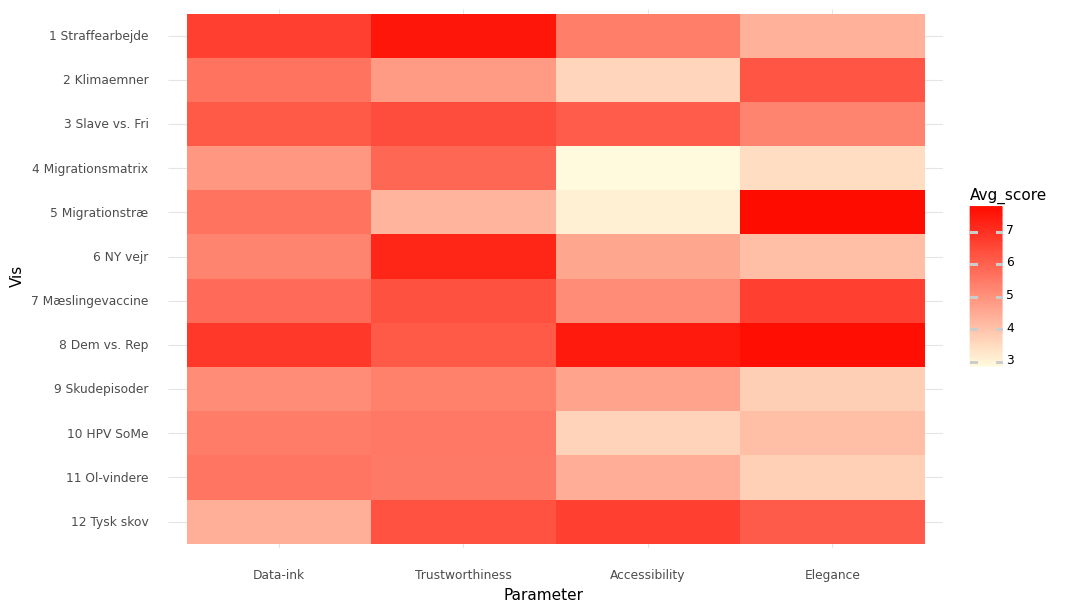

<ggplot: (8760864218082)>

In [152]:
(ggplot(df_lang)
 + geom_tile(aes(x = "Parameter", y = "Vis", fill = "Avg_score"))
 + scale_y_discrete(limits = vis_list)
 + scale_x_discrete(limits = ("Data-ink", "Trustworthiness", "Accessibility", "Elegance"))
 + scale_fill_gradient(low='#FFFADD', high='#FF0C00')
 + theme_minimal()
)

# Lad os prøve at lave et kort
Det kan have fordele at lave kort direkte i plotnine, fordi det er let at plotte. Kortene bliver ikke pæne, men som en del af undersøgelsesprocessen eller som prototyper, kan de fint gå an!

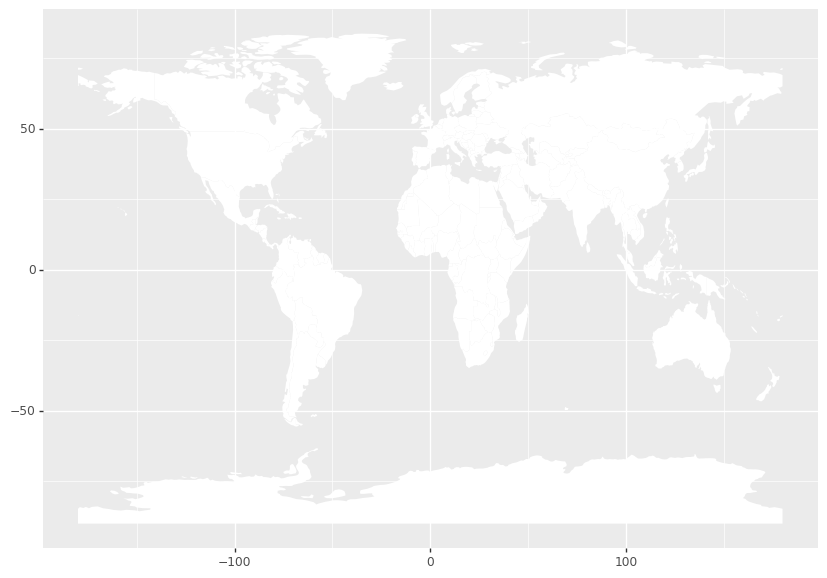

<ggplot: (8760861810631)>

In [153]:
import geopandas as gpd

gpd.datasets.available
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

(ggplot(world)
 + geom_map(fill = "white", color = "lightgrey", size = 0)
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin_2d : Removed 1 rows containing non-finite values.


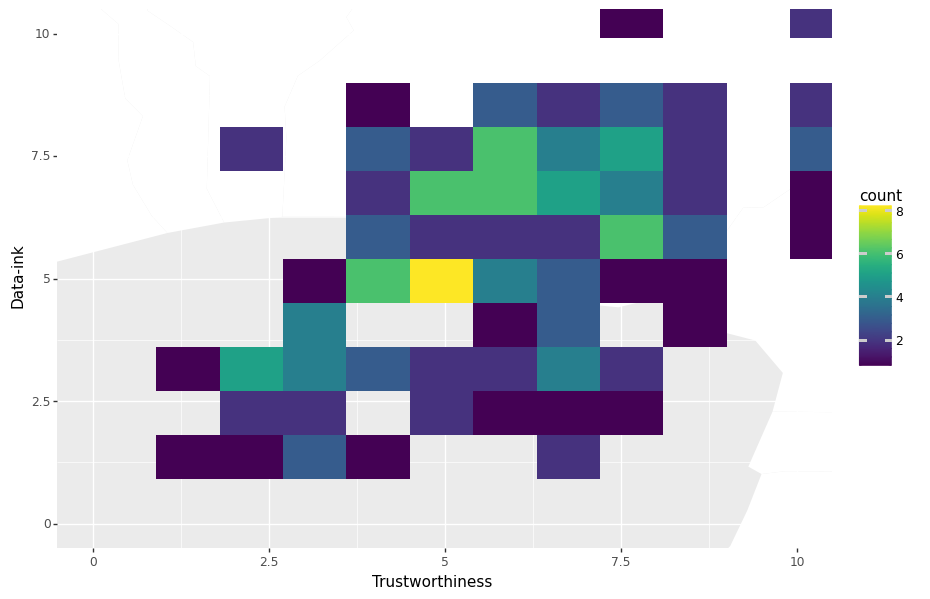

<ggplot: (8760863901778)>

In [171]:
(ggplot(world)
 + geom_map(fill = "white", color = "lightgrey", size = 0)
 + coord_cartesian(ylim = (0, 10), xlim = (0, 10))
 + geom_bin_2d(df, aes(x = "Trustworthiness", y = "Data-ink"), size = 10, bins = 10)
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 2 rows containing missing values.


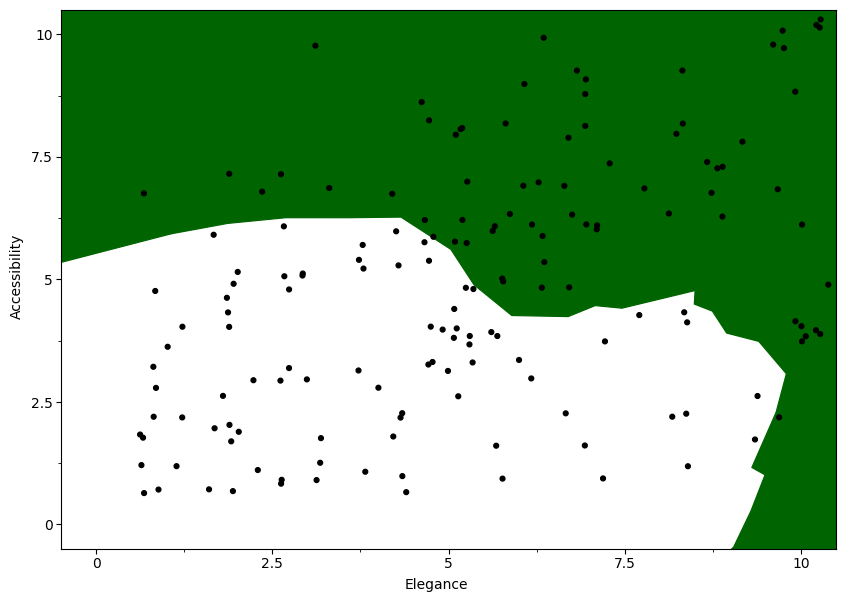

<ggplot: (8760860887034)>

In [155]:
(ggplot(world)
 + geom_map(fill = "darkgreen", color = "darkgreen")
 + geom_jitter(df, aes(x = "Elegance", y = "Accessibility"))
# + xlim(0, 10)
# + ylim(0, 10)
 + coord_cartesian(ylim = (0, 10), xlim = (0, 10)) # Det her er den bedste måde, at definere grænser på, fordi den beholder data, der falder udenfor.
 + theme_matplotlib()
)

## Themes
Et hurtigt kig på plotnines foruddefinerede temaer.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


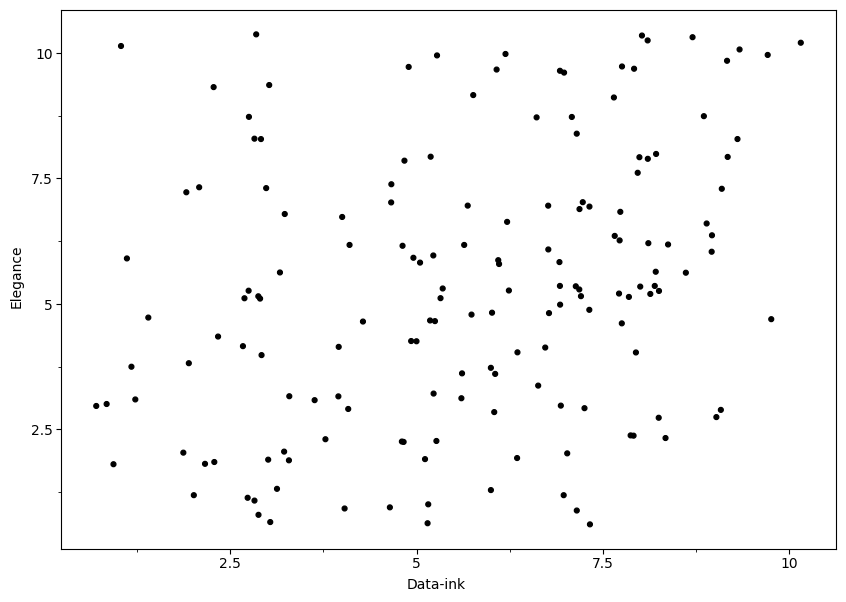

<ggplot: (8760862226887)>

In [156]:
(ggplot(df, aes(x = "Data-ink", y = "Elegance"))
 + geom_jitter()
# + theme_538()
# + theme_bw()
# + theme_classic()
# + theme_dark()
# + theme_gray()
# + theme_light()
# + theme_linedraw()
+ theme_matplotlib()
# + theme_minimal()
# + theme_seaborn()
# + theme_tufte()
# + theme_void()
# + theme_xkcd()
)